# Assignment 1: Time Series 
- Florencia Luque
- Simon Schmetz

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
data_raw = pd.read_excel('data/INE_IPC.xlsx')

data_raw.rename(columns={
    'Unnamed: 0': 'time',
    '    Índice general': 'general_index',
    '    01 Alimentos y bebidas no alcohólicas': 'food_beverages',
    '    02 Bebidas alcohólicas y tabaco': 'alc_tobacco',
    '    03 Vestido y calzado': 'clothing_footwear',
    '    04 Vivienda, agua, electricidad, gas y otros combustibles': 'housing_utilities',
    '    05 Muebles, artículos del hogar y artículos para el mantenimiento corriente del hogar': 'furniture_household',
    '    06 Sanidad': 'health',
    '    07 Transporte': 'transport',
    '    08 Comunicaciones': 'communications',
    '    09 Ocio y cultura': 'leisure_culture',
    '    10 Enseñanza': 'education',
    '    11 Restaurantes y hoteles': 'restaurants_hotels',
    '    12 Otros bienes y servicios': 'other_goods_services'
}, inplace=True)

data_raw['time'] = pd.to_datetime(data_raw['time'], format='%YM%m')
data = data_raw.copy()

In [3]:
### Funcions

# plot lineplot and histogram
def plot_eda(data, feature, color='skyblue', transform_func=None):
    plt.figure(figsize=(18, 6))

    # Line plot of the feature over time
    plt.subplot(1, 3, 1)
    plt.plot(data['time'], data[feature], marker='.', color=color)
    plt.xlabel('Time')
    plt.ylabel(feature.replace('_', ' ').title())
    plt.title(f'{feature.replace("_", " ").title()} Over Time')
    plt.grid(True)

    # Histogram of the feature
    plt.subplot(1, 3, 2)
    plt.hist(data[feature].dropna(), bins=30, edgecolor='k', color=color, density=True)

    mean = data[feature].mean()
    std = data[feature].std()
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    p = np.exp(-0.5 * ((x - mean) / std)**2) / (std * np.sqrt(2 * np.pi))

    plt.plot(x, p, color='red', linewidth=2)
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Density')
    plt.title(f'Histogram + Normal Dist of {feature.replace("_", " ").title()}')
    plt.grid(True)

    # Autocorrelation plot
    plt.subplot(1, 3, 3)
    plot_acf(data[feature].dropna(), lags=40, alpha=0.05, ax=plt.gca())
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of {feature.replace("_", " ").title()}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# statistical tests
from scipy.stats import jarque_bera
from statsmodels.tsa.stattools import adfuller

def stat_tests(data,feature):
    print("Testing for Stationarity and Normality of Featzre:", feature)


    ### Perform Jarque-Bera test (normality test)
    jb_stat, jb_p_value = jarque_bera(data[feature])

    # Print the test statistic and p-value
    print('\nJarque-Bera Statistic:', jb_stat)
    print('p-value:', jb_p_value)

    ### Perform Dickey-Fuller test (Stationarity test)
    result = adfuller(data[feature])

    # Print the test statistic and p-value
    print('\nADF Statistic:', result[0])
    print('p-value:', result[1])
    
    print("\n\n")


# plot Autocorrelations
from statsmodels.graphics.tsaplots import plot_acf
def plot_autocorrelations(data, feature, lags=40):
    plt.figure(figsize=(10, 7))
    plot_acf(data[feature], lags=lags, alpha=0.05)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of {feature.replace("_", " ").title()}')
    plt.grid(True)
    plt.show()

## Untransformed Data

In [4]:
data.head()

,time,general_index,food_beverages,alc_tobacco,clothing_footwear,housing_utilities,furniture_household,health,transport,communications,leisure_culture,education,restaurants_hotels,other_goods_services
0,2002-01-01,69.530,65.859,46.340,82.717,58.763,81.364,86.313,63.805,128.593,101.553,58.352,120.172,113.191
1,2002-02-01,69.590,65.836,46.348,81.782,58.888,81.475,86.844,64.089,126.667,101.580,58.430,120.102,113.091
2,2002-03-01,70.165,66.185,46.436,83.519,59.041,81.819,87.210,65.007,125.098,103.157,58.496,120.764,112.792
3,2002-04-01,71.118,66.614,48.321,89.456,59.223,82.336,87.665,66.018,125.098,102.658,58.556,121.006,112.421
4,2002-05-01,71.374,66.902,48.446,90.427,59.324,82.686,87.212,66.191,125.098,102.968,58.563,120.744,112.490


KeyboardInterrupt: 

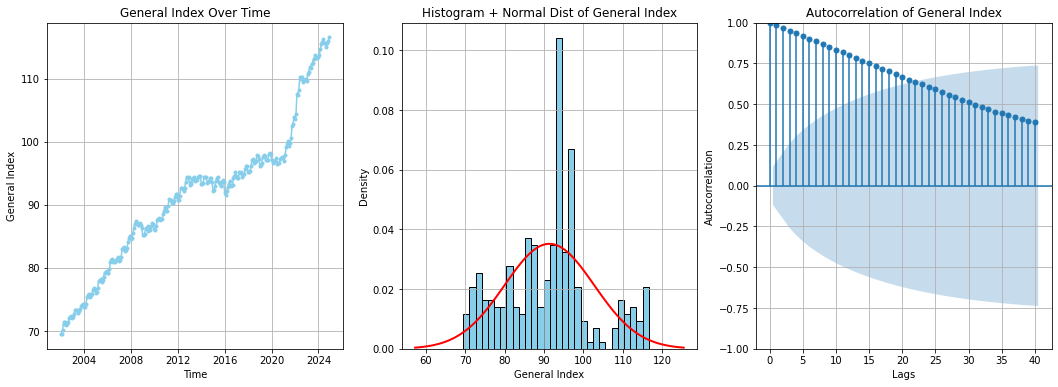

In [5]:
# Example usage with first difference transformation
plot_eda(data, 'general_index')

In [ ]:
stat_tests(data,"general_index")

Testing for Stationarity and Normality of Featzre: general_index

Jarque-Bera Statistic: 2.678679081583458
p-value: 0.26201866408523433

ADF Statistic: 0.24111582678991922
p-value: 0.9744756341825375





In [ ]:
jarque_bera(data["general_index"])
skewness = data['general_index'].skew()
kurtosis = data['general_index'].kurtosis()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')


Skewness: 0.205499170861594
Kurtosis: -0.25882098804075815


## Deterministic Transform

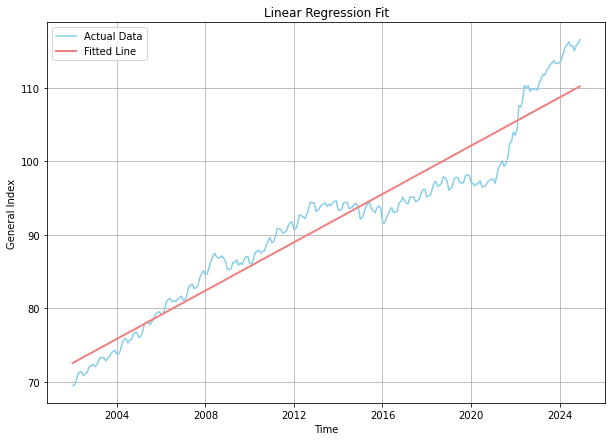

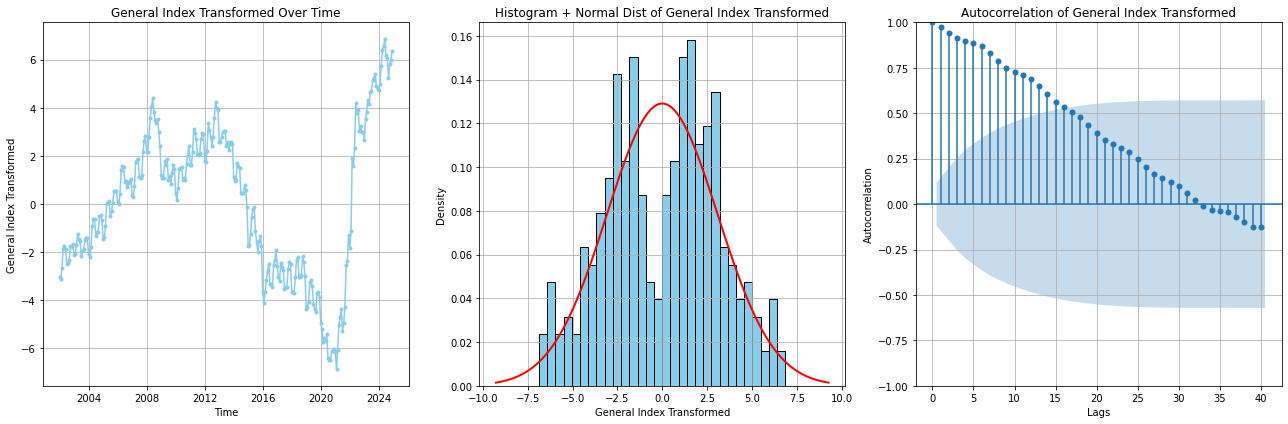

In [ ]:
# deterministic transform

from sklearn.linear_model import LinearRegression

# fit model
X = data[['time']].apply(lambda x: x.dt.to_period('M').apply(lambda y: y.ordinal)).values.reshape(-1, 1)
y = data['general_index']

model = LinearRegression()
model.fit(X, y)


# Plot the results
plt.figure(figsize=(10, 7))
plt.plot(data['time'], y, color="skyblue", label='Actual Data')
plt.plot(data['time'], model.predict(X), color='lightcoral', linewidth=2, label='Fitted Line')
plt.xlabel('Time')
plt.ylabel('General Index')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


# Subtract the trend from the general_index to get the detrended series
data['general_index_transformed'] = data['general_index'] - model.predict(X)

plot_eda(data, 'general_index_transformed')

In [ ]:
stat_tests(data, 'general_index_transformed')

Testing for Stationarity and Normality of Featzre: general_index_transformed

Jarque-Bera Statistic: 6.282679932264114
p-value: 0.043224839258658276

ADF Statistic: -1.9667311258827143
p-value: 0.30134808470414964





## Stochastic transform

In [ ]:
#transform the data
data['general_index_diff'] = data['general_index'].diff()
data = data.dropna(subset=['general_index_diff'])

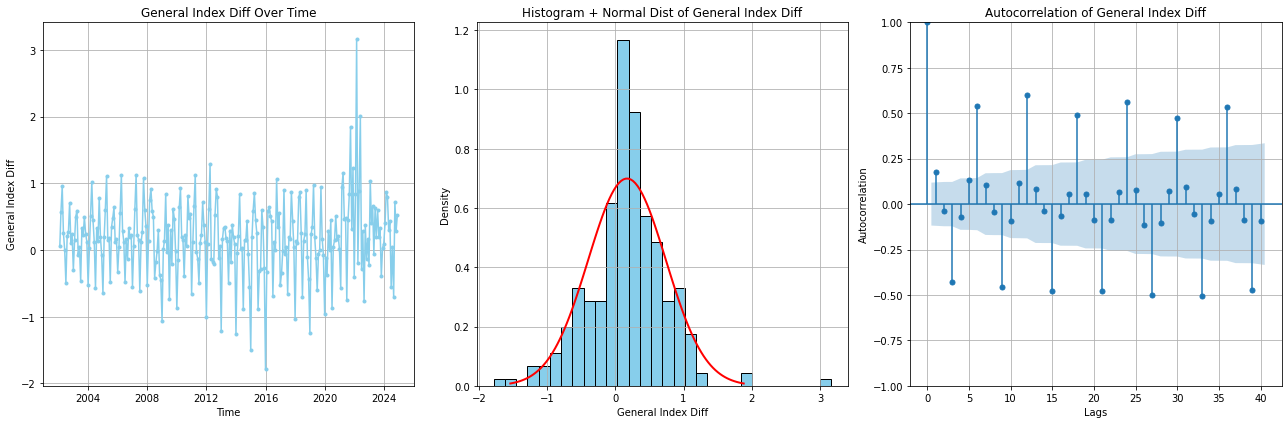

In [ ]:
# Example usage with first difference transformation
plot_eda(data, 'general_index_diff')

In [ ]:
stat_tests(data,"general_index_diff")

Testing for Stationarity and Normality of Featzre: general_index_diff

Jarque-Bera Statistic: 106.96401767325457
p-value: 0.0

ADF Statistic: -3.2759823296539294
p-value: 0.01598679958242521





<Figure size 720x504 with 0 Axes>

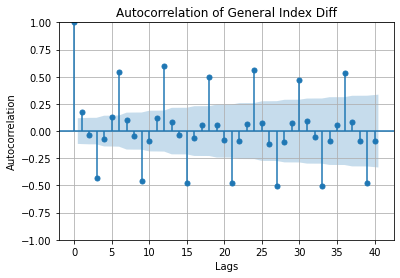

In [ ]:
plot_autocorrelations(data, 'general_index_diff')